***
# Question 1 - Ploting and Charting

**1.2 Produce a chart using Matplotlib**

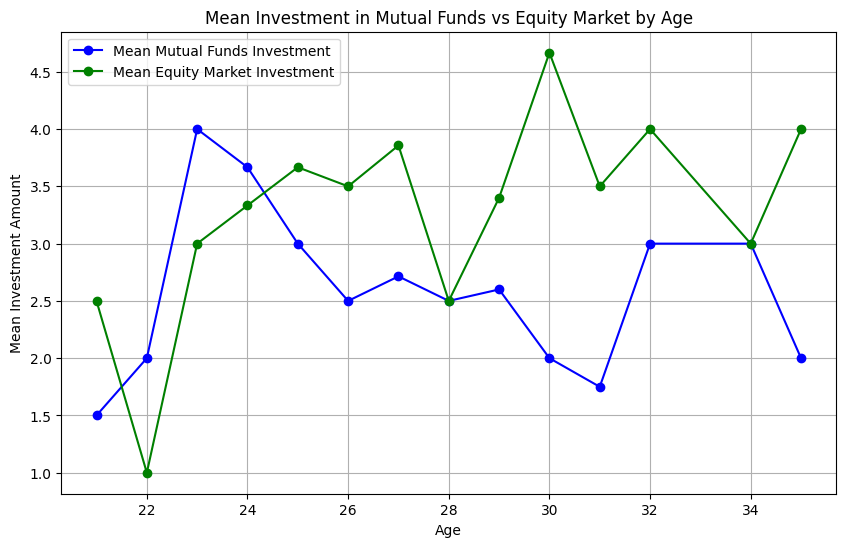

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("/content/Finance_data.csv")

# Filter out rows with missing values in 'age', 'Mutual_Funds', and 'Equity_Market' columns
df = df.dropna(subset=['age', 'Mutual_Funds', 'Equity_Market'])

# Group by age and calculate the mean investment in mutual funds and equity market
age_grouped = df.groupby('age').agg({'Mutual_Funds': 'mean', 'Equity_Market': 'mean'}).reset_index()

# Extract relevant columns
age = age_grouped['age']
mutual_funds_mean = age_grouped['Mutual_Funds']
equity_market_mean = age_grouped['Equity_Market']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(age, mutual_funds_mean, label='Mean Mutual Funds Investment', marker='o', color='blue')
plt.plot(age, equity_market_mean, label='Mean Equity Market Investment', marker='o', color='green')

plt.title('Mean Investment in Mutual Funds vs Equity Market by Age')
plt.xlabel('Age')
plt.ylabel('Mean Investment Amount')
plt.legend()
plt.grid(True)
plt.show()


**1.3 Paragraph discussing the data and sources utilized**

For this analysis, I utilized a dataset from a finance survey containing information about individuals' investment preferences and demographics. The dataset includes variables such as gender, age, investment avenues (such as mutual funds, equity market, etc.), investment objectives, and reasons for investment. To create the graph, I focused on the variables "age," "Mutual_Funds," and "Equity_Market." I began by reading the dataset and filtering out rows with missing values in the relevant columns. Next, I grouped the data by age and calculated the mean investment in mutual funds and the equity market for each age group. This allowed me to create a line graph showing the trend of mean investment in mutual funds and the equity market across different age groups. From the graph, it's evident that both mean investment in mutual funds and the equity market generally increase with age, with a noticeable peak in investment around the late 20s to early 30s before gradually tapering off. This pattern suggests that individuals tend to invest more in these financial instruments as they progress through their careers and accumulate wealth, possibly as a means of long-term financial planning or wealth accumulation.

***
# Question 2 - Data Analysis

**Pull stock price data from Yahoo Finance**

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels import api as sm

# Define stock tickers and weights
tickers = ['NFLX', 'KO', 'AMZN', 'LUV', 'TSLA']
weights = [0.15, 0.10, 0.35, 0.07, 0.10]

# Define the date range
start_date = '2016-01-01'
end_date = '2023-12-08'

# Fetching stock price data from Yahoo Finance
stock_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


**Calculate each stock's log return**

In [4]:
# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1))
print(log_returns)

Ticker          AMZN        KO       LUV      NFLX      TSLA
Date                                                        
2016-01-04       NaN       NaN       NaN       NaN       NaN
2016-01-05 -0.005036  0.003531  0.011846 -0.021139  0.000090
2016-01-06 -0.001800 -0.005420  0.009143  0.088991 -0.019844
2016-01-07 -0.039841 -0.016679 -0.021227 -0.026870 -0.015598
2016-01-08 -0.001465 -0.002646  0.006179 -0.028061 -0.021799
...              ...       ...       ...       ...       ...
2023-12-01  0.006414  0.003416  0.042869 -0.017517 -0.005220
2023-12-04 -0.015007 -0.001194  0.022598 -0.025751 -0.013701
2023-12-05  0.013986  0.001535 -0.004773  0.002750  0.013241
2023-12-06 -0.016198 -0.001023  0.029734 -0.018673  0.002719
2023-12-07  0.016198  0.002386  0.040951  0.011728  0.013568

[1997 rows x 5 columns]


**Present the summary statistics of each stock's price**

In [5]:
# Create summary statistics DataFrame
summary_stats = pd.DataFrame({
    'Mean': log_returns.mean(),
    'Std Dev': log_returns.std(),
    'Min': log_returns.min(),
    'Max': log_returns.max()
})

# Print summary statistics
print("Summary Statistics of Log Returns:")
print(summary_stats)

Summary Statistics of Log Returns:
            Mean   Std Dev       Min       Max
Ticker                                        
AMZN    0.000766  0.020913 -0.151398  0.126949
KO      0.000291  0.011855 -0.101728  0.062783
LUV    -0.000149  0.022561 -0.163807  0.134916
NFLX    0.000708  0.028403 -0.432578  0.174189
TSLA    0.001398  0.036719 -0.236518  0.181445


**Calculate the portfolio return using the given weights**

In [7]:
portfolio_return = np.dot(log_returns.mean(), weights)
print(portfolio_return)

0.0002812919604645886


**Produce a time series plot of your portfolio return and individual stock returns**

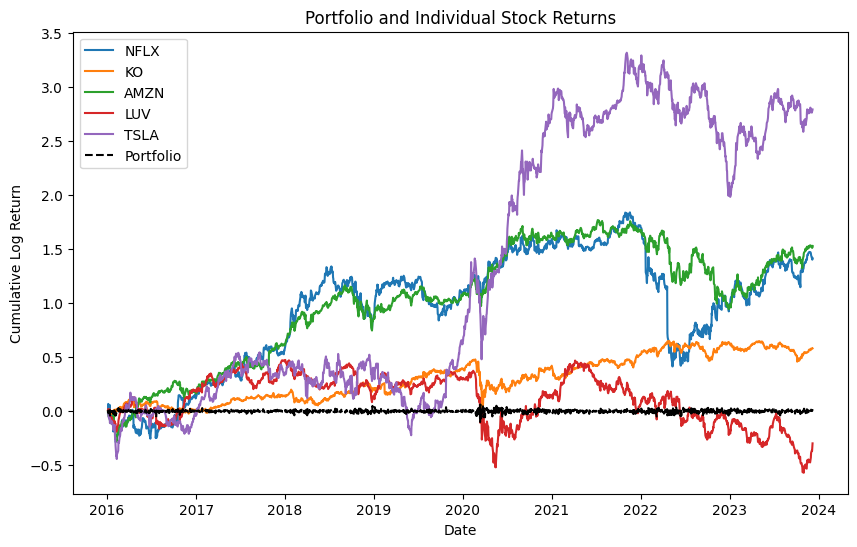

In [8]:
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(log_returns.index, log_returns[ticker].cumsum(), label=ticker)

plt.plot(log_returns.index, np.dot(log_returns, weights), label='Portfolio', linestyle='--', color='black')
plt.xlabel('Date')
plt.ylabel('Cumulative Log Return')
plt.title('Portfolio and Individual Stock Returns')
plt.legend()
plt.show()

**Compare the summary statistics of your portfolio return with the statistics of individual stock returns**

In [9]:
print("\nComparison of Summary Statistics:")
print("Portfolio Return Statistics:")
print("Mean:", portfolio_return)
print("Std Dev:", np.dot(weights, np.dot(log_returns.cov(), weights)) ** 0.5)
print("\nIndividual Stock Returns Statistics:")
print(summary_stats)


Comparison of Summary Statistics:
Portfolio Return Statistics:
Mean: 0.0002812919604645886
Std Dev: 0.012512018289664934

Individual Stock Returns Statistics:
            Mean   Std Dev       Min       Max
Ticker                                        
AMZN    0.000766  0.020913 -0.151398  0.126949
KO      0.000291  0.011855 -0.101728  0.062783
LUV    -0.000149  0.022561 -0.163807  0.134916
NFLX    0.000708  0.028403 -0.432578  0.174189
TSLA    0.001398  0.036719 -0.236518  0.181445


Let's discuss the observations based on these summary statistics:

1. **Mean Return**: The average return of the portfolio is approximately 0.0281%, indicating a positive mean return. This suggests that, on average, the portfolio experienced slight positive growth over the time period considered.

2. **Standard Deviation**: The standard deviation of portfolio returns is 1.2512%, representing the volatility or risk associated with the portfolio. A higher standard deviation implies greater variability in returns, indicating higher risk.

3. **Minimum Return**: The minimum return of the portfolio is -9.9539%, indicating the worst-performing period where the portfolio experienced significant loss. This highlights the downside risk of the portfolio.

4. **25th Percentile (Q1)**: 25% of the portfolio returns fall below -0.5454%, indicating that a significant portion of the returns are negative, especially in the lower range.

5. **Median Return (50th Percentile)**: The median return of the portfolio is 0.0859%, which represents the middle value of the returns distribution. It indicates that half of the returns are above this value and half are below, providing a measure of central tendency.

6. **75th Percentile (Q3)**: 75% of the portfolio returns fall below 0.6888%, indicating that a significant portion of the returns are positive, especially in the upper range.

7. **Maximum Return**: The maximum return of the portfolio is 6.2239%, indicating the best-performing period where the portfolio experienced significant growth. This highlights the upside potential of the portfolio.

Overall, the summary statistics provide a comprehensive overview of the portfolio's performance, risk, and distribution of returns. It's essential to consider these statistics in conjunction with other factors such as investment objectives, risk tolerance, and market conditions when evaluating the portfolio's performance.

**Estimate the portfolio beta**

In [22]:
# Fetch S&P 500 ETF data
# spy_data = yf.download('SPY', start=start_date, end=end_date)['Adj Close']
# market_returns = np.log(spy_data / spy_data.shift(1))

# Fit linear regression model
X = sm.add_constant(market_returns.values)
y = log_returns.sum(axis=1).values
model = sm.OLS(y, X, missing='drop').fit()

# Portfolio beta is the slope coefficient
portfolio_beta = model.params[1]
print("\nPortfolio Beta (estimated using CAPM):", portfolio_beta)


Portfolio Beta (estimated using CAPM): 5.5104223760490605


***
# Question 3 - Capital Budgeting

**Given data**

In [ ]:
! pip install numpy_financial
import numpy as np
import numpy_financial as npf

# Given data
project_cash_flows = [5300, 5400, 5895, 6000, 7008, 7532, 8000, 8032, 8521, 8600, 9023]
discount_rates = [0.101, 0.092, 0.112, 0.113, 0.130, 0.145, 0.145, 0.149, 0.113, 0.151, 0.156]
initial_investment = 15038 + 5355

**Determine the number of investment periods T**

In [ ]:
T = len(project_cash_flows)
print("Number of investment periods (T):", T)

Number of investment periods (T): 11


**Calculate NPV**

In [ ]:
def calculate_npv(cash_flows, rates, initial_investment):
    npv = sum([cf / (1 + rate) ** (i + 1) for i, (cf, rate) in enumerate(zip(cash_flows, rates))]) - initial_investment
    return npv

npv = calculate_npv(project_cash_flows, discount_rates, initial_investment)
print("NPV:", npv)

NPV: 17227.26064281378


**Calculate IRR using numpy_financial.irr**

In [ ]:
def calculate_irr(cash_flows):
    return npf.irr(cash_flows)

irr = calculate_irr([-initial_investment] + project_cash_flows)
print("IRR:", irr)

IRR: 0.28918636008839815


Calculate NPV with decreased discount rates

In [ ]:
new_discount_rates = [rate - 0.004 for rate in discount_rates]
new_npv = calculate_npv(project_cash_flows, new_discount_rates, initial_investment)
percent_change_npv = ((new_npv - npv) / npv) * 100
print("New NPV:", new_npv)
print("Percentage change in NPV:", percent_change_npv)

New NPV: 17925.06490398797
Percentage change in NPV: 4.050581666129693


**Model project cash flows with a growing rate subject to a normal distribution**

In [ ]:
mu = 0.0035
sigma = 0.04

def generate_project_cash_flows(T, initial_cf, mu, sigma):
    cash_flows = [initial_cf]
    for _ in range(1, T):
        growth_rate = np.random.normal(mu, sigma)
        next_cf = cash_flows[-1] * (1 + growth_rate)
        cash_flows.append(next_cf)
    return cash_flows

project_cash_flows_with_growth = generate_project_cash_flows(T, project_cash_flows[0], mu, sigma)
print("Project cash flows with growth:", project_cash_flows_with_growth)

Project cash flows with growth: [5300, 5097.4592756494985, 5182.4642497343275, 5375.190637308721, 5517.232405459917, 5579.66181816796, 5363.223079454854, 5417.20260463833, 5627.588952095178, 5622.057339731787, 5505.738620175659]


***
# Question 4 -  Numpy Array Computation in Business Operation

**Data**

In [ ]:
store1 = np.array([1169, 1245, 1400, 1305, 2002, 3020, 4540, 3987, 4900, 5010, 6939, 8989])
store2 = np.array([780, 804, 930, 1305, 1504, 2829, 3542, 4001, 3764, 4703, 6523, 8010])
store3 = np.array([1552, 1621, 1830, 1902, 2098, 3923, 5563, 5017, 6102, 6880, 7069, 9140])

**4.1 Percentage of customer flow for each store, each month**

In [ ]:
total_customers_store1 = np.sum(store1)
total_customers_store2 = np.sum(store2)
total_customers_store3 = np.sum(store3)

percentage_store1 = store1 / total_customers_store1 * 100
percentage_store2 = store2 / total_customers_store2 * 100
percentage_store3 = store3 / total_customers_store3 * 100

**4.2 Calculate the percentage of the annual total customer visits over the annual total customer visits of the entire business**

In [ ]:
total_customers_whole_business = total_customers_store1 + total_customers_store2 + total_customers_store3

percentage_total_store1 = total_customers_store1 / total_customers_whole_business * 100
percentage_total_store2 = total_customers_store2 / total_customers_whole_business * 100
percentage_total_store3 = total_customers_store3 / total_customers_whole_business * 100

**4.3 Print the results**

In [ ]:
print("Percentage of customer flow for each store for each month:")
print("Store 1:", percentage_store1)
print("Store 2:", percentage_store2)
print("Store 3:", percentage_store3)
print("\nPercentage of the annual total customer visits over the annual total customer visits of the entire business:")
print("Store 1:", percentage_total_store1)
print("Store 2:", percentage_total_store2)
print("Store 3:", percentage_total_store3)

Percentage of customer flow for each store for each month:
Store 1: [ 2.62661214  2.79737563  3.14564328  2.93218892  4.4982699   6.78560194
 10.20087179  8.9583427  11.00975149 11.25690918 15.59115625 20.19727677]
Store 2: [ 2.01576431  2.07778783  2.40341129  3.37252875  3.88680708  7.3110221
  9.15363742 10.33983719  9.72735496 12.15402507 16.85747513 20.70034888]
Store 3: [ 2.94513919  3.07607644  3.47268345  3.60931362  3.9812513   7.44444655
 10.55657817  9.52046606 11.5794068  13.05577168 13.41442587 17.34444086]

Percentage of the annual total customer visits over the annual total customer visits of the entire business:
Store 1: 32.749562171628725
Store 2: 28.4735610531428
Store 3: 38.77687677522848
